## FIRST MODEL
DETECTING MELANOMAS BY COMPUTER VISION


10 epocas mas otras metricas para medir el recall y matriz de confusion


Importation of libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.metrics import Precision, Recall

## LOADING AND PREPROCESSING


In [19]:
# Definir directorios
base_dir = r"C:\Users\jakif\CODE\PROYECTO-FINAL\images\melanoma_cancer_dataset" # Cambia esto a la ubicación de tus datos
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Crear generadores de datos para aumentar el dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalización de píxeles
    rotation_range=20, # Rotaciones aleatorias
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255) # Solo normalización

# Cargar imágenes en lotes
#flow_frome_directory: Carga imágenes de un directorio y las etiquetas de las subcarpetas
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # size of the input images (Neural networks require fixed input dimensions)
    batch_size=32,
    class_mode='binary'  # Binary classification (benign o malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


it is possible to add other data augmentation method if more variability is desired, such as :

Vertical flip (vertical_flip).

Random zoom (zoom_range).

Brightness or contrast changes (brightness_range, contrast_stretching).

More extreme or customized rotations.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Salida binaria (0: benigno, 1: maligno)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Resumen del modelo
model.summary()


c:\Users\jakif\anaconda3\envs\COMPUTER_VISION\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    train_generator,
    epochs=10,  # Ajusta según sea necesario
    validation_data=test_generator
)

c:\Users\jakif\anaconda3\envs\COMPUTER_VISION\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 122s 398ms/step - accuracy: 0.7341 - loss: 0.5562 - precision: 0.7774 - recall: 0.6197 - val_accuracy: 0.8810 - val_loss: 0.3141 - val_precision: 0.9224 - val_recall: 0.8320
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 109s 361ms/step - accuracy: 0.8478 - loss: 0.3525 - precision: 0.8629 - recall: 0.8055 - val_accuracy: 0.8910 - val_loss: 0.2707 - val_precision: 0.9151 - val_recall: 0.8620
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 104s 345ms/step - accuracy: 0.8646 - loss: 0.3342 - precision: 0.8777 - recall: 0.8340 - val_accuracy: 0.8940 - val_loss: 0.2701 - val_precision: 0.9121 - val_recall: 0.8720
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 105s 347ms/step - accuracy: 0.8731 - loss: 0.3121 - precision: 0.8848 - recall: 0.8454 - val_accuracy: 0.8920 - val_loss: 0.2657 - val_precision: 0.9066 - val_recall: 0.8740
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 105s 348ms/step - accuracy: 0.8708 - loss: 0.3047 - precision: 0.8783 - recall: 0.8471 - val_accuracy: 0

In [22]:
#guardar los pesos


model.save_weights('melanoma_model_1.weights.h5')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8788 - loss: 0.2556 - precision: 0.8913 - recall: 0.8586

    loss: 0.2328
    Accuracy: 89.50%
    Precision: 90.89%
    Recall: 87.80%



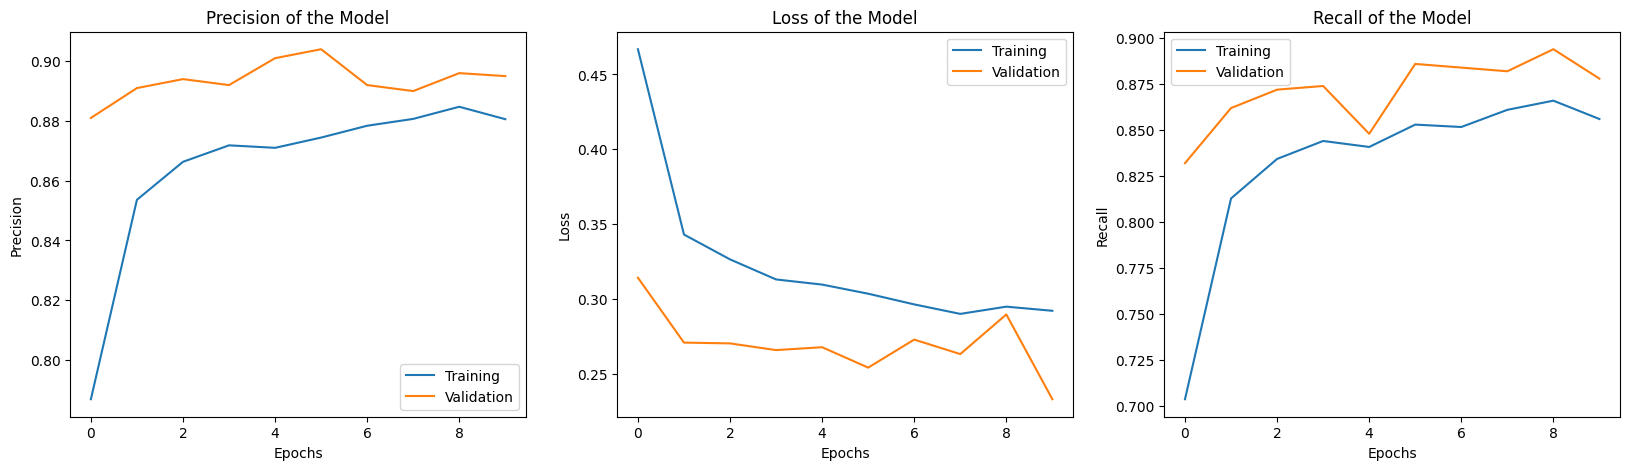

In [27]:
results = model.evaluate(test_generator)  # Devuelve [loss, accuracy, precision, recall]
print(f'''
    loss: {results[0]:.4f}
    Accuracy: {results[1]*100:.2f}%
    Precision: {results[2]*100:.2f}%
    Recall: {results[3]*100:.2f}%
''')




# Adjusting the layout to include a third subplot
plt.figure(figsize=(20, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision of the Model')

# Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of the Model')

# Recall
plt.subplot(1, 3, 3)
plt.plot(history.history['recall'], label='Training')  # Corrected key to 'recall'
plt.plot(history.history['val_recall'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall of the Model')

plt.show()



32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step
F1 Score: 0.49
              precision    recall  f1-score   support

      benign       0.50      0.51      0.51       500
   malignant       0.50      0.48      0.49       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



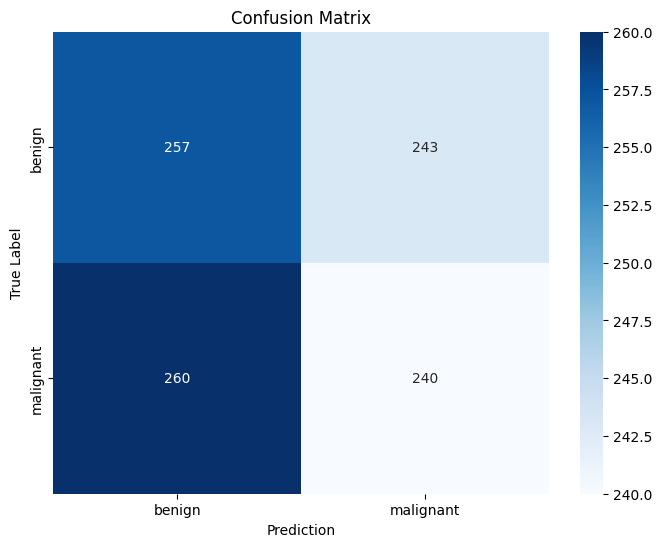

In [42]:
#Evaluar con F1 Score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo y las etiquetas verdaderas
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
# Calcular el F1 Score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1:.2f}')
# Imprimir el informe de clasificación
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Prediction')
plt.ylabel('True Label')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
import cv2
import numpy as np
def predict_image(image_path, model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalizar
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    if prediction[0][0] > 0.9:
        print(prediction[0][0])
        print("Melanoma maligno detectado")
    else:
        print(prediction[0][0])
        print("Melanoma benigno detectado")
# Prueba con una imagen

predict_image(r'C:\Users\jakif\CODE\PROYECTO-FINAL\images\PREPROCESSED_DATA_copy\test\malignant_images\ISIC_0034529.jpg', model)#maligno
predict_image(r'C:\Users\jakif\CODE\PROYECTO-FINAL\images\PREPROCESSED_DATA_copy\test\benign_images\ISIC_0034527.jpg', model)#benigno
predict_image(r'C:\Users\jakif\CODE\PROYECTO-FINAL\images\melanoma_cancer_dataset\test\benign\melanoma_9605.jpg', model)#maligno
predict_image(r'C:\Users\jakif\CODE\PROYECTO-FINAL\images\melanoma_cancer_dataset\test\malignant\melanoma_10108.jpg', model)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.0
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.99898916
Melanoma maligno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0.42662176
Melanoma benigno detectado
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0.99356115
Melanoma maligno detectado
